In [ ]:
from pandas._libs import missing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from google.colab import drive
from sqlalchemy import true
from sklearn.decomposition import PCA
import numpy as np
from keras.optimizers import SGD
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

In [ ]:
df=pd.read_csv("store.csv")

In [ ]:
df=df.drop(['FRE'],axis=1)
df=df.drop(['MON'],axis=1)
df=df.drop(['CLASSES'],axis=1)
df=df.drop(['COUPONS'],axis=1)
df=df.drop(['STYLES'],axis=1)
df=df.drop(['RESPONDED'],axis=1)
df=df.drop(['MAILED'],axis=1)
df=df.drop(['TMONSPEND'],axis=1)
df=df.drop(['FREDAYS'],axis=1)

<ipython-input-4-db2e3791caf4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=0.8,square=True,


<Axes: title={'center': 'Corr. Pearson'}>

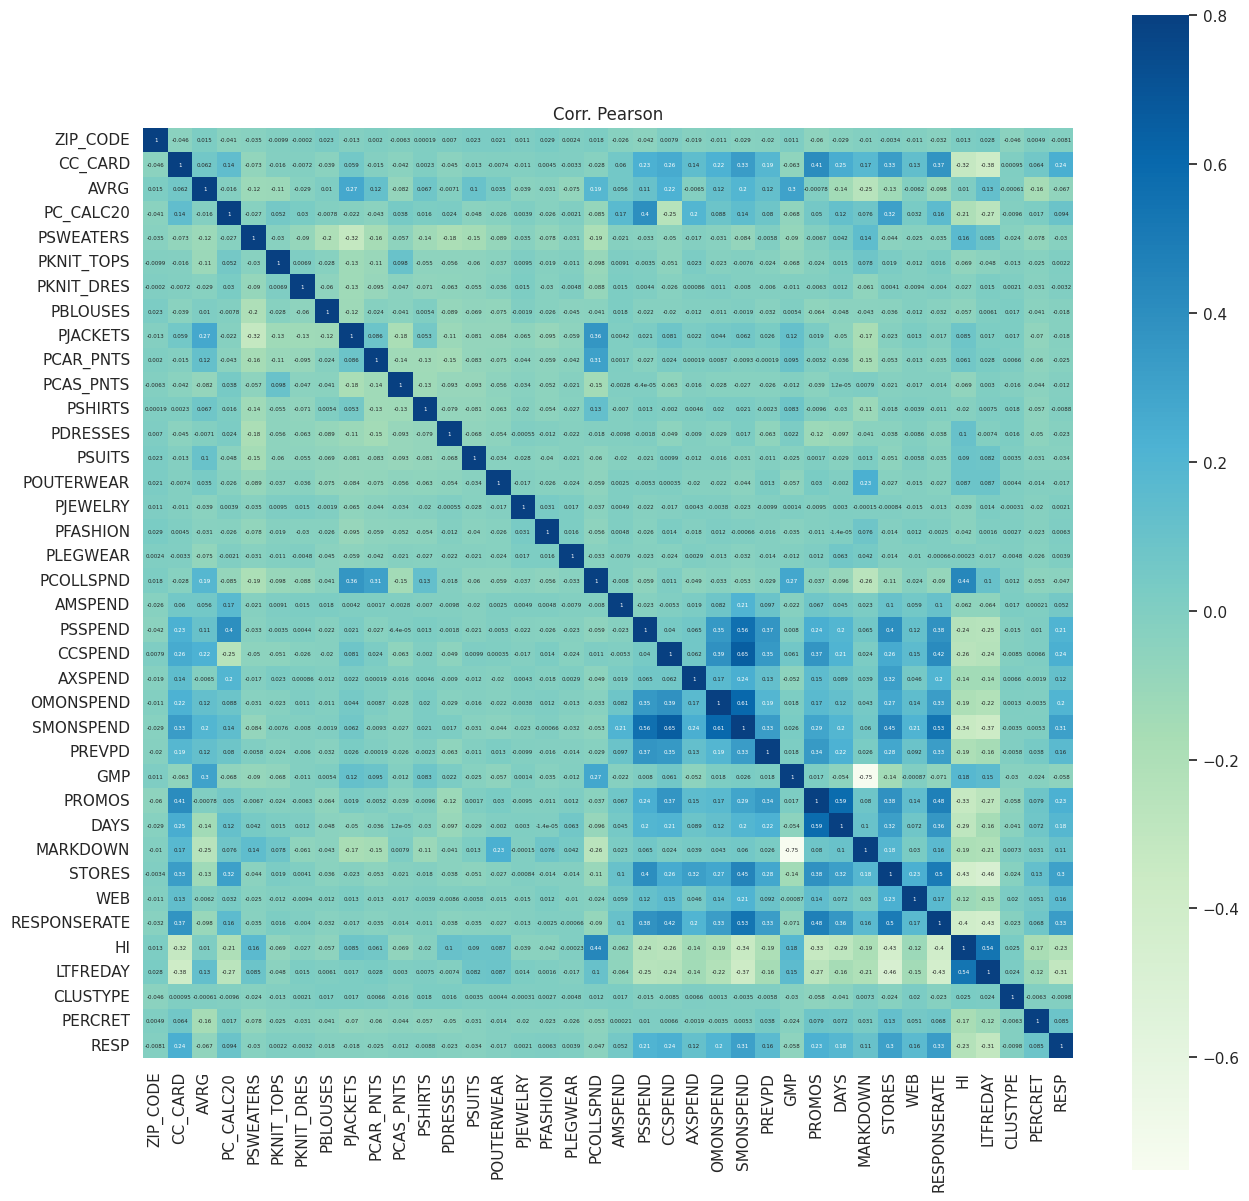

In [ ]:
sns.set(style='whitegrid', font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Corr. Pearson")
sns.heatmap(df.corr(),vmax=0.8,square=True,
            cmap="GnBu",linecolor='r',
            annot=True,annot_kws={'size':4})

In [ ]:
df = pd.get_dummies(df, columns=['VALPHON'])

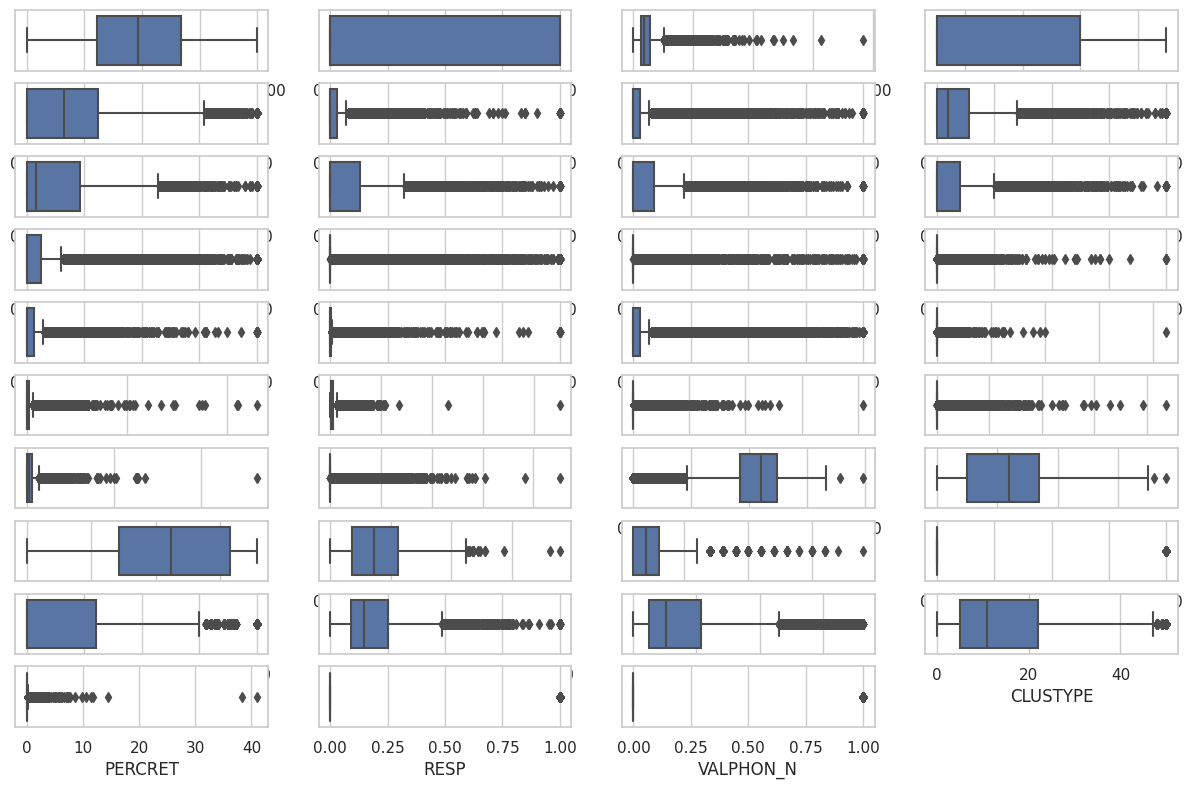

In [ ]:
plt.figure(figsize=(15,15))
col =df.columns[:-1]
for i in enumerate(col):
  plt.subplot(16,4,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [ ]:
for i in col:
  q1 = df[i].quantile(0.10)
  q4 = df[i].quantile(0.90)
  df[i][df[i]<=q1] = q1
  df[i][df[i]>=q4] = q4

<ipython-input-7-270797681709>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1] = q1
<ipython-input-7-270797681709>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4] = q4
<ipython-input-7-270797681709>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1] = q1
<ipython-input-7-270797681709>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

In [ ]:
X = df.drop('RESP',axis=1)
y = df['RESP']

In [ ]:
rus=RandomUnderSampler(random_state = 0)
X_rus, y_rus = rus.fit_resample(X,y)

In [ ]:
y_rus_dummies = pd.get_dummies(y_rus)

In [ ]:
scalerMinMax = MinMaxScaler()
scalerMinMax.fit(X_rus)
X_scaler = scalerMinMax.transform(X_rus)

In [ ]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_scaler,y_rus_dummies,random_state=50,test_size=0.3)

In [ ]:
# Modelo Neuronal
modelANN= Sequential()
modelANN.add(Dense(40,activation='sigmoid' ))
modelANN.add(Dense(20,activation='relu' ))
modelANN.add(Dense(10,activation='relu' ))
modelANN.add(Dense(5,activation='relu' ))
modelANN.add(Dense(2,activation='sigmoid'))

sgd = SGD(learning_rate=0.008, momentum=0.80)

modelANN.compile(optimizer=sgd,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
modelANN.fit(x = X_train_rus, y = y_train_rus, validation_data=(X_test_rus,y_test_rus), batch_size=50, epochs=250, verbose=1)

Epoch 1/250
102/102 [==============================] - 1s 5ms/step - loss: 0.6857 - accuracy: 0.6024 - val_loss: 0.6731 - val_accuracy: 0.6548
Epoch 2/250
102/102 [==============================] - 0s 3ms/step - loss: 0.6540 - accuracy: 0.6918 - val_loss: 0.6294 - val_accuracy: 0.6950
Epoch 3/250
102/102 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7076 - val_loss: 0.5652 - val_accuracy: 0.7263
Epoch 4/250
102/102 [==============================] - 0s 3ms/step - loss: 0.5648 - accuracy: 0.7230 - val_loss: 0.5690 - val_accuracy: 0.7227
Epoch 5/250
102/102 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.7240 - val_loss: 0.5445 - val_accuracy: 0.7217
Epoch 6/250
102/102 [==============================] - 0s 4ms/step - loss: 0.5503 - accuracy: 0.7300 - val_loss: 0.5428 - val_accuracy: 0.7365
Epoch 7/250
102/102 [==============================] - 0s 4ms/step - loss: 0.5469 - accuracy: 0.7258 - val_loss: 0.5396 - val_accuracy: 0.7217

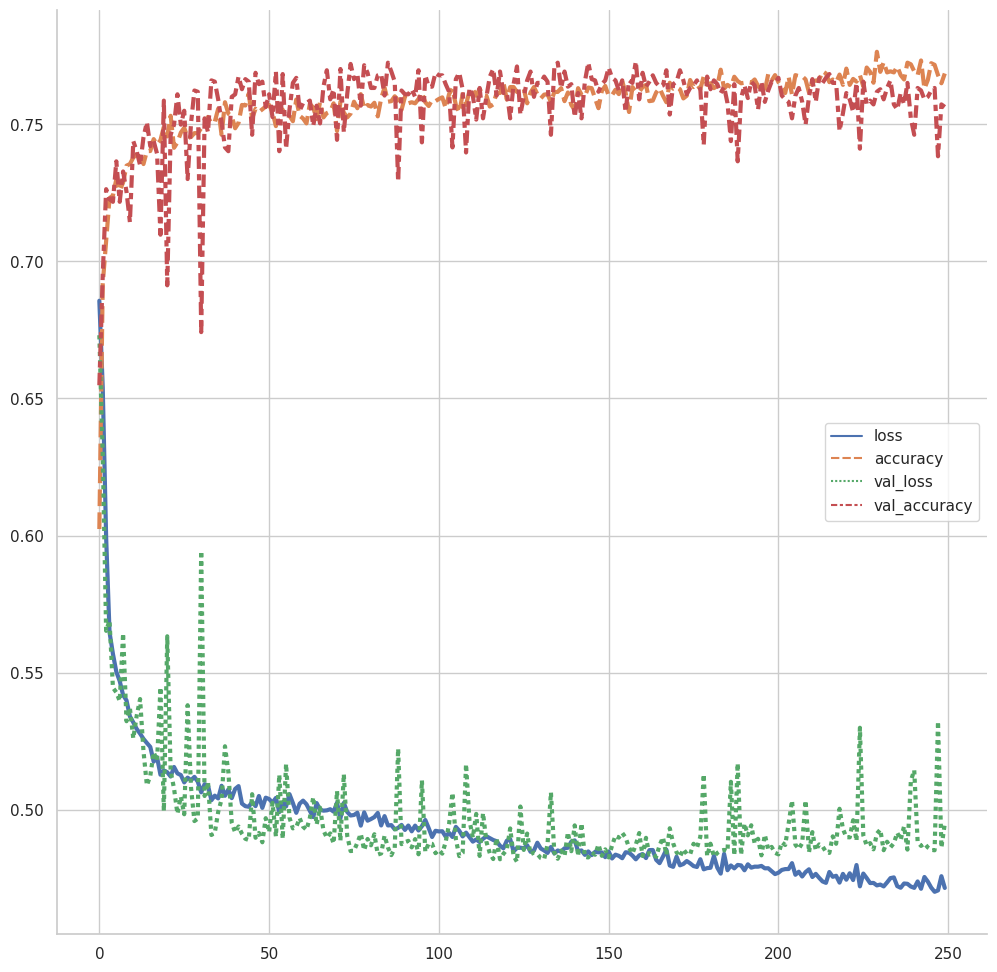

In [ ]:
loss = pd.DataFrame(modelANN.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss,lw=3)
sns.despine()

In [ ]:
y_train_rus_argmax = np.argmax(y_train_rus.values, axis=1)
y_test_rus_argmax = np.argmax(y_test_rus.values, axis=1)

NameError: ignored

In [ ]:
y_predict = modelANN.predict(X_test_rus)

NameError: ignored

In [ ]:
y_predict_argmax = np.argmax(y_predict, axis=1)

NameError: ignored

In [ ]:
print(confusion_matrix(y_test_rus_argmax, y_predict_argmax))

[[774 278]
 [250 865]]


In [ ]:
print(classification_report(y_test_rus_argmax, y_predict_argmax))

NameError: ignored